# 데이터 분석 라이브러리 활용하기! 
## - 월드컵 데이터 분석하기

### 학습 목표
- 파이썬 라이브러리 Numpy, Pandas와 Matplotlib, Seaborn을 활용해봅니다.
- 데이터를 정제하는 방법을 수행하고 학습하며 데이터 전처리 단계를 진행합니다.
- 데이터를 쉽게 이해하고 분석할 수 있도록 데이터 시각화를 연습해봅니다.

---

# Contents
**1. [월드컵 데이터](#1.-월드컵-데이터)**    
1-1. [데이터 분석 준비하기](#1-1.-데이터-분석-준비하기)      
1-2. [전체 데이터 한눈에보기](#1-2.-전체-데이터-한눈에보기)      
1-3. [데이터 전처리](#1-3.-데이터-전처리)      
1-4. [그래프로 확실하게 확인하기](#1-4.-그래프로-확실하게-확인하기)      

**2. [월드컵 매치 데이터](#2.-월드컵-매치-데이터)**     
2-1. [데이터 분석 준비하기](#2-1.-데이터-분석-준비하기)    
2-2. [꼭 필요한 데이터 전처리](#2-2.-꼭-필요한--데이터-전처리)      
2-3. [나라 이름 전처리하기](#2-3.-나라-이름-전처리하기)     
2-4. [국가별 득점 수 구하기](#2-4.-국가별-득점-수-구하기)

---

# 1. 월드컵 데이터 

## 1-1. 데이터 분석 준비하기

본격적으로 데이터를 분석하기에 앞서, 먼저 앞으로의 데이터 분석에 필요한 module들을 import 해 봅니다.

데이터 분석을 위한 파이썬 라이브러리인 numpy, pandas, matplotlib과 함께 또다른 시각화 툴인 seaborn 까지 사용해 보겠습니다.

numpy, pandas는 데이터 처리를 위한 다양하고 강력한 기능을 지원하며, matplotlib와 seaborn은 데이터 시각화를 위한 유용한 모듈입니다. 

특히 seaborn은 matplotlib 를 기반으로 다양한 색상 테마, 통계용 차트 기능이 추가된 패키지입니다.

### (1) Import Modules
**주의** : 꼭 아래 코드 셀을 가장 먼저 실행하신 후, 실습을 진행해주세요!

In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd 

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### (2) Load Dataset

이번 프로젝트에서 사용할 월드컵 데이터셋을 가져와보겠습니다.

- **월드컵**이란?

월드컵은 축구 국제 기구인 국제 축구 연맹(FIFA)에 가맹한 축구 협회(연맹)의 국가대표팀이 참가하는 국제 축구 대회입니다. 월드컵에는 다양한 국가들이 참여하며, 매 4년마다 개최됩니다.

- 그렇다면 **월드컵 데이터셋**이란?

2014년도까지 개최된 월드컵 20회에 대한 개최 연도, 국가, 우승 국가 등의 정보를 담고 있습니다. 

In [2]:
# read_csv로 csv 파일을 불러옵니다.pandas를 활용해 데이터를 가져와보도록 하겠습니다.
worldcup = pd.read_csv('WorldCups.csv')

# 데이터프레임의 크기를 확인합니다.
print(worldcup.shape)

# 데이터프레임 상위 5개 값 확인
worldcup.head()

(20, 10)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 개최 연도 | 1930
Country | 개최 국가 | Uruguay
Winner | 우승 국가 | Uruguay
Runners-Up | 준우승 국가 | Argentina
Third | 3위 국가 | USA
Fourth | 4위 국가 | Yugoslavia
GoalsScored | 총 득점 수 | 70
QualifiedTeams | 참가 국가 수 | 13
MatchesPlayed | 총 경기 수 | 18
Attendance | 총 관중 | 590549

## 1-2. 전체 데이터 한눈에보기
- 데이터프레임의 각 열에 대한 정보와, 비어있는 데이터의 개수를 간단히 확인합니다.

In [3]:
# info 확인하기
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB


- object는 문자열 데이터를, int64는 정수형 데이터를 나타냅니다.
- 정수형이어야 할 Attendance 컬럼이 object로 저장되어 있으므로, 이를 처리해줘야 할 것으로 보입니다.

## 1-3. 데이터 전처리
- 먼저 데이터 불러오기를 완료했다면, 데이터 전처리 과정을 진행해보겠습니다. 
- 데이터 전처리 단계에서는 데이터 수집 이후 데이터 정제 과정으로 비어있는 값, 중복값, 이상값 제거, 원하는 형태로의 변환등을 수행합니다.



### (1) `Attendance` : object → int 형으로 변환
- 하나의 컬럼의 값들을 일괄적으로 변환해주기 위해 `astype` 함수를 사용합니다.

In [4]:
# astype 함수를 활용하여 Attendance 컬럼 값을 int형으로 변환
worldcup["Attendance"] = worldcup["Attendance"].astype('int64')

ValueError: invalid literal for int() with base 10: '590.549'

- `590.549` 를 int형으로 변환할 수 없다는 내용의 에러가 발생합니다.
- 이는 `.` 문자로 인해 일어난 것으로, 가운데에 있는 `.`을 없애주도록 하겠습니다.

#### 1. 사용할 함수 `attendance_to_int` 정의
- 간단하게 `replace`를 활용해서 "."을 없애줍니다.
- replace 함수는 전체 특정값을 사용자가 지정한 값으로 변경해주는 역할을 합니다. 
- 여기서는 "." 문자를 ""로 변경하여 마치 제거한 것과 동일한 기능을 할 수 있습니다.

In [5]:
def attendance_to_int(i):
    i = i.replace(".","")
    return i

#### 2. 함수 적용결과 간단하게 확인
- 단 하나의 문자열로 먼저 함수의 결과를 확인합니다.

In [6]:
attendance_to_int('330.33')

'33033'

- 구현한 함수가 의도한 바대로 "." 문자 제거를 잘 수행하고 있습니다. 

#### 3. 데이터프레임에 `apply` 함수로 적용
- 함수 적용 결과에 문제가 없다면, 전체 데이터프레임에 적용시켜줍니다.

In [7]:
worldcup["Attendance"] = worldcup["Attendance"].apply(attendance_to_int)
worldcup["Attendance"] = worldcup["Attendance"].astype('int64')
worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


모두 적용되었습니다. 다시 한 번 `info` 함수를 사용하여 데이터셋을 살펴볼까요?

In [8]:
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.6+ KB


- Attendance 컬럼이 int64의 정수형 데이터로 잘 변환된 것을 확인할 수 있습니다!

### (2) 경기 당 득점 수 확인하기
- 원본 데이터에는 한 월드컵에서 득점된 전체 골의 수 `GoalsScored`와 진행된 전체 매치 수 `MatchesPlayed`가 있습니다.
- 우리는 이 둘을 활용하여 한 매치 당 득점된 골의 수의 평균을 구해보겠습니다.
- `Goals_per_Match` = `GoalsScored` / `MatchesPlayed`

In [9]:
worldcup["Goals_per_Match"] = worldcup["GoalsScored"] / worldcup["MatchesPlayed"]
worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goals_per_Match
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,2.781250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135,2.781250
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975,2.968750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753,2.552632


## 1-4. 그래프로 확실하게 확인하기
- 이번엔 데이터를 그래프로 옮겨서 확인해보겠습니다. 
- 시각화 작업은 데이터를 더 빠르고 확실하게 이해하는데에 필수적입니다.


### (1) 전체 관중수, 경기 수 그래프 그려보기
- plt 플롯의 선과 마커는 원하는대로 커스터마이징이 가능합니다.

[다양한 커스터마이징 살펴보기](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

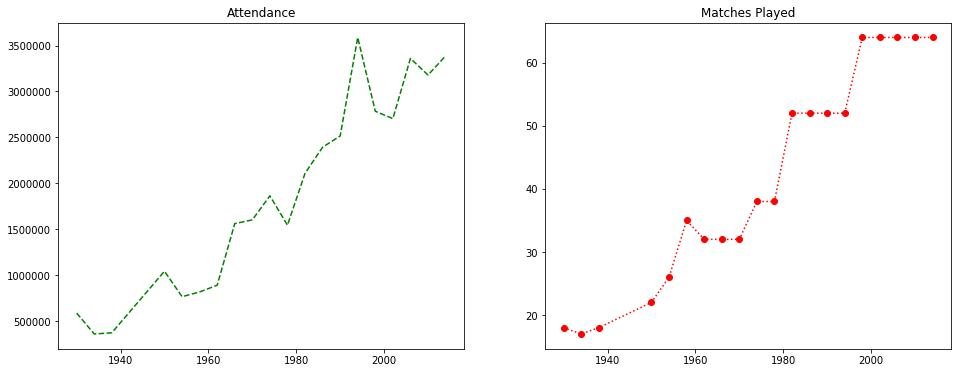

In [10]:
# 그래프 사이즈 설정
plt.figure(figsize=(16,6))

# 한 번에 두 개 이상의 그래프를 그리고 싶다면 subplot을 활용하면 됩니다.
# 그리고자 하는 그래프들을 행(row), 열(column) 로 배열할 때,
# subplot(row, column, order) 순서대로 숫자를 입력하면 됩니다.

plt.subplot(121)
plt.plot("Year","Attendance", "g--" , data = worldcup)
plt.title("Attendance")
plt.subplot(122)
plt.plot("Year", "MatchesPlayed", "ro:" , data = worldcup)
plt.title("Matches Played")

plt.show()

- 연도가 지남에 따라 전체 관중의 수와 경기 수가 늘어난 것을 데이터 시각화를 한 눈에 확인할 수 있습니다. 

### (2) 전체 득점 수, 전체 매치 수, 매치 당 골 수 그래프 그려보기

- 이번에는 득점에 관련된 그래프들을 확인해보겠습니다.

- `GoalsScored`, `MatchesPlayed`, `Goals_per_Match`는 모두 년도별로 비교하면 좋은 데이터이기 때문에, 한 그래프 안에 모두 표현해보겠습니다.

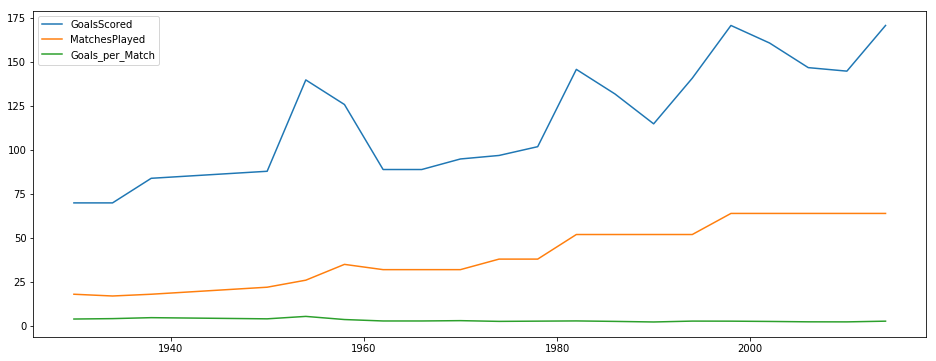

In [11]:
plt.figure(figsize=(16,6))

plt.plot("Year", "GoalsScored", data = worldcup)
plt.plot("Year", "MatchesPlayed", data = worldcup)
plt.plot("Year", "Goals_per_Match", data = worldcup)

# 범례 확인하기
plt.legend()
plt.show()

- 컬럼 별 값의 스케일이 다르기 때문에 별개의 그래프로 시각화 하는 것이 데이터를 확인하는 데 있어 더 좋은 방법일 수 있습니다.

---

# 2. 월드컵 매치 데이터

## 2-1. 데이터 분석 준비하기

### (1) Load Dataset

이번에는 월드컵 매치 데이터를 확인해보겠습니다.     
이번에는 `WorldCupMatches.csv` 데이터를 사용합니다. 역시 pandas로 데이터를 가져옵니다.

- **월드컵 매치 데이터셋**이란?
월드컵 매치 데이터셋은 매 회 이루어진 월드컵 경기에 대한 정보를 담고 있습니다. 특히 한 회에 많은 수의 경기가 이루어지기 때문에 위에서 살펴본 기본 월드컵 데이터보다 훨씬 많은 데이터가 담겨있습니다.

In [12]:
# read_csv
match = pd.read_csv('WorldcupMatches.csv')

# shape 출력
print(match.shape)

# 상위 5개 값 확인
match.head()

(4572, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


- 역시 4572개라는 꽤 많은 수의 데이터가 들어 있는 것을 확인할 수 있습니다.

- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 경기가 진행된 연도 | 1930
Datetime | 경기 시작 시간 | 13 Jul 1930 - 15:00
Stage | 스테이지(조별리그, 16강, 8강 등) | Group 1
Stadium | 경기장 | Pocitos
City | 도시 | Montevideo
Home Team Name | 홈 팀 국가 이름 | France
Home Team Goals | 홈 팀 득점 수 | 4	
Away Team Goals | 원정 팀 득점 수 | 1
Away Team Name | 원정 팀 국가 이름 | Mexico
Win conditions | 승리 상황  | Italy win after extra time
Attendance | 관중 수 | 4444
Half-time Home Goals | 홈 팀 전반전 득점 수 | 3
Half-time Away Goals | 원정 팀 전반전 득점 수 | 0
Referee | 주심의 이름 | LOMBARDI Domingo (URU)	
Assistant 1 | 제 1 부심(선심)의 이름 | CRISTOPHE Henry (BEL)	
Assistant 2 | 제 2 부심(선심)의 이름 | REGO Gilberto (BRA)	
RoundID | 라운드의 고유 ID | 201
MatchID | 경기의 고유 ID | 1096
Home Team Initials | 홈 팀의 세 글자 이니셜 | FRA
Away Team Initials | 원정 팀의 세 글자 이니셜 | MEX

## 2-2. 꼭 필요한  데이터 전처리
- 데이터를 다루기 전에 꼭 확인하고 처리해야 할 것들이 있습니다. 바로 확인해보겠습니다.

### (1) 전체 데이터 확인

- 세부적으로 보기 이전에, 먼저 전체 데이터를 확인해보겠습니다.

In [13]:
# info 확인
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

- 총 4572개의 행과, 20개의 컬럼이 존재합니다. 하지만, Non-Null count는 852개 밖에 안되는군요. 결측치를 확인해 볼 필요가 있겠습니다.

### (2) 결측치 (빈 데이터)

- 결측치가 있다면 pandas에서 사용하는 대부분의 함수 또는 연산이 작동하지 않습니다. 따라서 결측치를 먼저 확인해주는 습관을 가지고 있으면 좋습니다.




- 결측치는 `isnull()` 함수로 확인해볼 수 있습니다.

In [14]:
# isnull로 결측치 확인
match.isnull().head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- `isnull()` 함수를 그냥 사용하면 위와 같이 비어있지 않고 어떤 값이든 들어있다면 False, 값이 없어 비어있다면 True로 표시가 됩니다.
- 하지만, 이렇게는 여전히 한 번에 볼 수 없습니다. 따라서 `isnull()` 뒤에 `sum()` 함수를 추가로 붙여주어 결측치의 개수를 확인해보겠습니다.


In [2]:
# 전체 컬럼별 결측치 개수 확인하기
match.isnull().sum()

NameError: name 'match' is not defined

- sum() 함수가 컬럼별로 (axis=0) 연산되었기 때문에 Series 형태로 보여지게 되었습니다.
- 여기에 sum()을 한 번 더 사용하면 전체 데이터프레임의 결측치 총 개수를 확인할 수 있습니다.

In [16]:
# 총 결측치 개수 확인하기
match.isnull().sum().sum()

74402

- 결측치의 총 개수가 74402개나 존재합니다. 그런데 독특한 패턴을 확인할 수 있습니다. 
- 바로 각 컬럼 별로 3720개라는 동일한 수의 결측값들이 존재한다는 것인데요, `isnull` 함수에 axis인자를 1로 설정하여 컬럼 별이 아니라 이번에는 행 별로 결측치 개수를 한번 확인해보겠습니다. 

In [17]:
match.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
4542    20
4543    20
4544    20
4545    20
4546    20
4547    20
4548    20
4549    20
4550    20
4551    20
4552    20
4553    20
4554    20
4555    20
4556    20
4557    20
4558    20
4559    20
4560    20
4561    20
4562    20
4563    20
4564    20
4565    20
4566    20
4567    20
4568    20
4569    20
4570    20
4571    20
Length: 4572, dtype: int64

- 위에 있는 행에서는 결측치가 한 개도 없었는데, 아래 행들에는 모두 20개의 결측치가 존재하는 것을 확인하였습니다. 
- 그런데 여기서 우리가 생각해봐야 하는 것은 바로 컬럼의 개수입니다. 이번 매치 데이터셋에는 총 20개의 컬럼이 있었는데, 한 행의 결측치 개수가 그와 동일한 20개이다..?
- 맞습니다. 이것은 바로 그 행이 모두 비어있는 값이라는 것을 의미합니다.
- 이렇게 비어 있는 행은 아무런 정보도 가지고 있지 않기 때문에 제거해주는 것이 좋습니다. 
- 그러나 결측치가 있다고 하여 해당 행을 무조건 제거하는 것은 의미있는 정보를 손실하는 위험성도 존재하기 때문에 우리는 항상 결측치를 제거하기 이전 위와 같이 여러 방향으로 확인해보는 것이 좋습니다.

- null값이 있는 행을 지우고 싶을 때에는 `dropna`를 활용하면 편리하게 지울 수 있습니다.

In [18]:
# dropna를 활용하여 null 값이 있는 행 지우기
match = match.dropna()
print(match.shape)

(850, 20)


In [19]:
match.isnull().sum().sum()

0

- 다시 결측치 개수를 확인해보니 모두 제거되었네요!

### (3) 중복된 데이터

- 비어있는 데이터 다음에는 중복된 데이터도 확인해봐야겠죠. `duplicated()` 함수를 활용해 간단히 확인할 수 있습니다.



- 역시 뒤에 `sum()`을 붙여  개수를 확인해보겠습니다.

In [20]:
match.duplicated().sum()

15

- 15개의 중복 데이터가 있군요! 
- 중복된 값을 삭제해주는 `drop_duplicates()`를 활용해서 지워주겠습니다.

In [21]:
# drop_duplicates
match = match.drop_duplicates()

In [22]:
match.duplicated().sum()

0

- 중복된 데이터까지 모두 깔끔하게 지워졌습니다! 
- 이제 본격적으로 시작해보도록 하겠습니다.

## 2-3. 나라 이름 전처리하기
- 뒤에 다양한 분석을 해보기 전에 나라 이름을 먼저 확인해보고 필요한 경우 처리를 해주도록 하겠습니다.

In [23]:
# unique를 사용하여 나라 이름 확인
match["Away Team Name"].unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Germany FR',
       'Uruguay', 'Wales', 'Northern Ireland', 'Soviet Union', 'Colombia',
       'Bulgaria', 'Korea DPR', 'Portugal', 'Israel', 'Morocco',
       'El Salvador', 'Australia', 'Haiti', 'German DR', 'Zaire',
       'IR Iran', 'Tunisia', 'Iran', 'Cameroon', 'New Zealand', 'Algeria',
       'Honduras', 'Kuwait', 'Iraq', 'Denmark', 'Canada',
       'rn">Republic of Ireland', 'rn">United Arab Emirates',
       'Costa Rica', 'Saudi Arabia', 'Russia', 'Greece', 'Nigeria',
       'South Africa', 'Japan', 'Croatia', 'Jamaica', 'Senegal',
       'Slovenia', 'Ecuador', 'China PR', "C�te d'Ivoire",
       

몇 가지 처리해주어야 할 나라이름들이 보입니다. 다음 나라 이름들을 `replace` 함수로  변환해주도록 하겠습니다.
- `Germany FR` → `Germany`
- `C�te d'Ivoire` → `Côte d’Ivoire`
- `rn">Bosnia and Herzegovina` → `Bosnia and Herzegovina`
- `rn">Serbia and Montenegro` → `Serbia and Montenegro`
- `rn">Trinidad and Tobago` → `Trinidad and Tobago`
- `rn">United Arab Emirates` → `United Arab Emirates`
- `rn">Republic of Ireland` → `Republic of Ireland`
- `Soviet Union` → `Russia`

- `rn">Bosnia and Herzegovina` 과 같이 데이터 안에 "가 있다면, 동일하게 "을 활용하여 문자열을 표현할 경우 문제가 발생합니다.
- 따라서 " 대신 `'`를 사용하여 이러한 문제를 해결할 수 있습니다. 

In [24]:
# replace 사용하여 변환
match = match.replace("Germany FR","Germany")
match = match.replace("C�te d'Ivoire","Côte d’Ivoire")
match = match.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
match = match.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
match = match.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
match = match.replace('rn">United Arab Emirates',"United Arab Emirates")
match = match.replace('rn">Republic of Ireland',"Republic of Ireland")
match = match.replace('Soviet Union','Russia')

- 잘 변환되었는지 확인해보겠습니다.

In [25]:
# unique 를 활용하여 변환 확인
match["Home Team Name"].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Russia',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR',
       'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic',
       'Iraq', 'Denmark', 'United Arab Emirates', 'Costa Rica',
       'Cameroon', 'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria',
       'Saudi Arabia', 'Bolivia', 'Greece', 'Jamaica', 'South Africa',
       'Japan', 'Croatia', 'China PR', 'Senegal', 'Slovenia', 'Ecuador',
       'Trinidad and Tobago', 'Serbia and Montenegro', 'Angola',
       'Czech Republic', 'Togo', 'Iran', 'Côte d’Ivoire', 'Ghana',
       'Ukraine', 'Serbia', 'New Zealand', 'Slovak

In [26]:
match["Away Team Name"].unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Uruguay',
       'Wales', 'Northern Ireland', 'Russia', 'Colombia', 'Bulgaria',
       'Korea DPR', 'Portugal', 'Israel', 'Morocco', 'El Salvador',
       'Australia', 'Haiti', 'German DR', 'Zaire', 'IR Iran', 'Tunisia',
       'Iran', 'Cameroon', 'New Zealand', 'Algeria', 'Honduras', 'Kuwait',
       'Iraq', 'Denmark', 'Canada', 'Republic of Ireland',
       'United Arab Emirates', 'Costa Rica', 'Saudi Arabia', 'Greece',
       'Nigeria', 'South Africa', 'Japan', 'Croatia', 'Jamaica',
       'Senegal', 'Slovenia', 'Ecuador', 'China PR', 'Côte d’Ivoire',
       'Czech Republic', 'Ghana', 'Togo', 'Ukraine',

- Home Team과 Away Team 국가들 모두 잘 변환되었네요!

그렇다면 Home Team에 있는 나라 이름 리스트와 Away Team의 리스트는 같을까요?
- 파이썬에서의 집합을 나타내는 `set` 을 활용하여 두 리스트가 동일한 지 확인해보겠습니다. 

In [27]:
set(match["Away Team Name"].unique()) - set(match["Home Team Name"].unique())

{'Dutch East Indies', 'Egypt', 'El Salvador', 'Israel', 'Kuwait'}

- Away에는 있지만 Home에는 없는 나라가 총 다섯 개국 있군요. 추후 두 데이터를 함께 다룰 때 주의해야 할 것으로 보입니다.

## 2-4. 국가별 득점 수 구하기
- 이번에는 각  국가별 득점 수를 구해보도록 하겠습니다. 어떤 나라가 많은 득점을 했을까요?

#### (1) Home Team과 Away Team 별 데이터 추출하기

- `groupby`로 우리가 원하는 데이터를 추출해낼 수 있습니다. 
- 각 나라가 홈 팀으로 얻은 득점과, 원정팀으로 얻은 득점을 합쳐 구해보겠습니다.

In [28]:
# groupby
match.groupby(['Home Team Name'])

- `groupby`만을 사용하면 결과는 함수가 반환됩니다.
- 여기서 우리가 합하고 싶은 `Home Team Goals` 컬럼을 추출하고, `sum()`으로 값을 확인해보도록 하겠습니다.

In [29]:
# sort_values
home = match.groupby(['Home Team Name'])['Home Team Goals'].sum().sort_values(ascending=False)
away = match.groupby(['Away Team Name'])['Away Team Goals'].sum().sort_values(ascending=False)

In [30]:
# home 팀 상위 5개 값 확인
home.head()

Home Team Name
Brazil       176.0
Germany      163.0
Argentina    109.0
Italy         99.0
Hungary       73.0
Name: Home Team Goals, dtype: float64

In [31]:
# away 팀 상위 5개 값 확인
away.head()

Away Team Name
Germany        59.0
Brazil         45.0
Spain          42.0
France         40.0
Netherlands    37.0
Name: Away Team Goals, dtype: float64

- Home Team으로 얻은 득점과 Away Team으로 얻은 득점 두 가지 모두 잘 생성되었군요.
- 이제 `concat` 함수를 활용해서 두 Series 데이터를 합쳐보겠습니다. 열을 늘리고 싶으므로, axis=1을 추가해주도록 하겠습니다.

In [32]:
# concat을 활용하여 두개의 Series 데이터 합치기
goal_per_country = pd.concat([home,away], axis = 1)
goal_per_country

,Home Team Goals,Away Team Goals
Algeria,5.0,7.0
Angola,0.0,1.0
Argentina,109.0,22.0
Australia,7.0,4.0
Austria,31.0,12.0
Belgium,25.0,27.0
Bolivia,1.0,0.0
Bosnia and Herzegovina,3.0,1.0
Brazil,176.0,45.0
Bulgaria,11.0,11.0


- 이 때, 아까 확인했던 Home Team 리스트와 Away Team 리스트의차이로 인해 NaN (Not a number) 값이 생겼습니다.

In [33]:
# NaN 값을 0으로 채워주고, 정수로 변환
goal_per_country = goal_per_country.fillna(0).astype('int64')
goal_per_country.isnull().sum()

Home Team Goals    0
Away Team Goals    0
dtype: int64

- 이제 두 값을 더해서 전체 골을 만들어보고, 전체 데이터를 `Goals`로 정렬해주도록 하겠습니다.

In [34]:
# Home Team Goals + Away Team Goals
# sort_values
goal_per_country["Goals"] = goal_per_country["Home Team Goals"] + goal_per_country["Away Team Goals"]
goal_per_country = goal_per_country.sort_values(by="Goals",ascending=False)
goal_per_country

,Home Team Goals,Away Team Goals,Goals
Germany,163,59,222
Brazil,176,45,221
Argentina,109,22,131
Italy,99,29,128
France,66,40,106
Spain,50,42,92
Hungary,73,14,87
Netherlands,49,37,86
Uruguay,62,18,80
England,54,25,79


- Home 과 Away에서 상위에 있던 팀들이 확인되네요.

#### (2) 상위 10개국 득점 수 시각화해보기

- 상위 10개국만 그래프로 시각화 해보겠습니다.
- 표에서 나라 이름이 index로 사용되었으므로, x는 `top_10.index`로 넣어주면 됩니다.

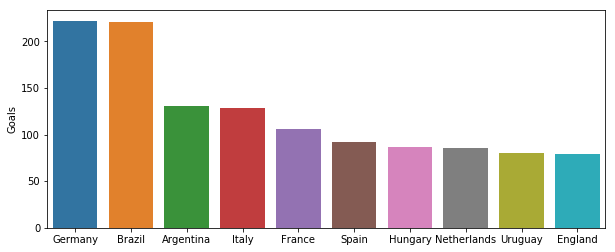

In [35]:
top_10 = goal_per_country[:10]

plt.figure(figsize=(10,4))
sns.barplot(data=top_10, x=top_10.index, y = "Goals")
plt.show()